# HSE 2023: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [1]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [2]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [3]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [15]:
import pandas as pd

# Предполагая, что y_name — это столбец DataFrame
# Использую метод factorize для кодирования текстовой целевой переменной
encoded_y, unique_labels = pd.factorize(y_name)

# Теперь в encoded_y у меня есть закодированные числовые значения целевой переменной,
# а unique_labels содержит соответствие между оригинальными текстовыми значениями и их числовыми кодами

Split your data into **train** and **test** keeping 30% for the test.

In [17]:
from sklearn.model_selection import train_test_split
test_size_fraction = 0.3  # 30% данных оставляем для тестирования

# Разделяю датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=test_size_fraction, random_state=42)

# Таким образом, я получаю обучающие наборы X_train и y_train,
# а также тестовые наборы X_test и y_test для оценки модели.


Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Создаю модель SVM с линейным ядром
svm_model = SVC(kernel='linear', random_state=42)
# Обучаю модель на обучающих данных
svm_model.fit(X_train, y_train)

# Делаю предсказания на тестовом наборе данных
predicted_y = svm_model.predict(X_test)

# Вычисляю метрики для оценки качества модели
accuracy = accuracy_score(y_test, predicted_y)
f1_weighted = f1_score(y_test, predicted_y, average='weighted')
conf_matrix = confusion_matrix(y_test, predicted_y)

print(f'Точность (Accuracy): {accuracy}')
print(f'F1-мера (F1 Score): {f1_weighted}')
print('Матрица ошибок (Confusion Matrix):')
print(conf_matrix)


Точность (Accuracy): 0.00625
F1-мера (F1 Score): 0.0037408424908424906
Матрица ошибок (Confusion Matrix):
[[1 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

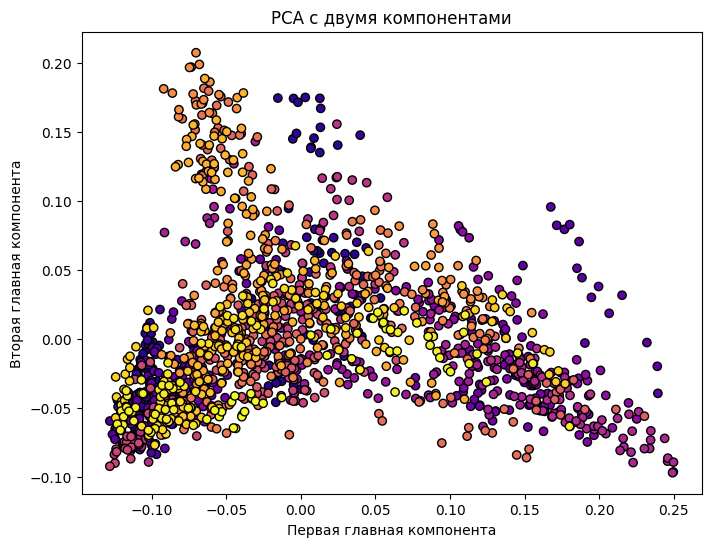

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Инициализация PCA для сокращения размерности до двух компонентов
pca_model = PCA(n_components=2, random_state=1)
# Применение PCA к данным для уменьшения размерности
transformed_X = pca_model.fit_transform(X)

# Визуализация результатов PCA с использованием палитры 'plasma'
plt.figure(figsize=(8, 6))
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c=encoded_y, cmap='plasma', edgecolor='k')
plt.title('PCA с двумя компонентами')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

# На этой диаграмме каждый класс (закодированный в encoded_y) представлен уникальным цветом из палитры 'plasma',
# что делает визуализацию более наглядной и понятной

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


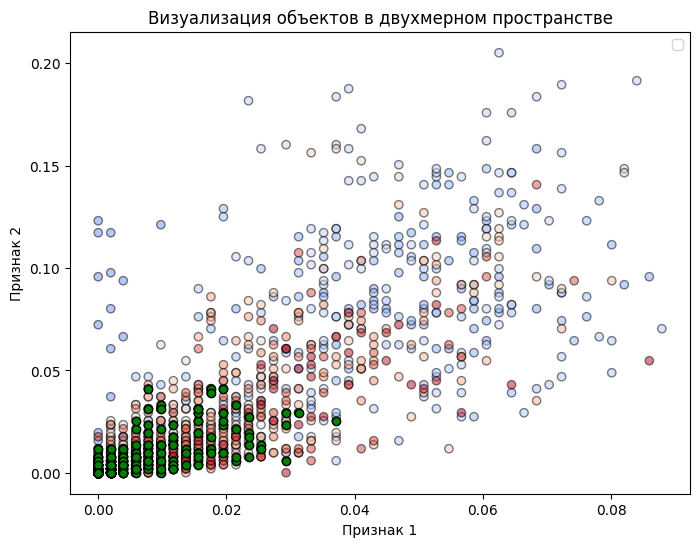

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Инициализирую график с размерами 8x6 дюймов для наглядной визуализации
plt.figure(figsize=(8, 6))

# Сначала рисую все объекты, используя цветовую карту 'coolwarm'. Применяю полупрозрачность для лучшей видимости перекрывающихся точек.
plt.scatter(X[:, 0], X[:, 1], c=encoded_y, cmap='coolwarm', edgecolor='k', alpha=0.5)

# Теперь выделяю объекты, у которых значения 'encoded_y' меньше или равны 15, зеленым цветом для контраста
plt.scatter(X[encoded_y <= 15, 0], X[encoded_y <= 15, 1], c='green', edgecolor='k')

# Добавляю названия осей и заголовок для понимания, что изображено на графике
plt.title('Визуализация объектов в двухмерном пространстве')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# Не забываю про легенду, чтобы было понятно, что означают зеленые точки
plt.legend()

# Показываю готовый график
plt.show()

# В этом коде я использовал два раза scatter для отображения разных классов объектов: первый раз для всех объектов с разноцветной картой 'coolwarm',
# а второй раз - для объектов с 'encoded_y' меньше или равным 15, выделив их зеленым для лучшей визуализации.


Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

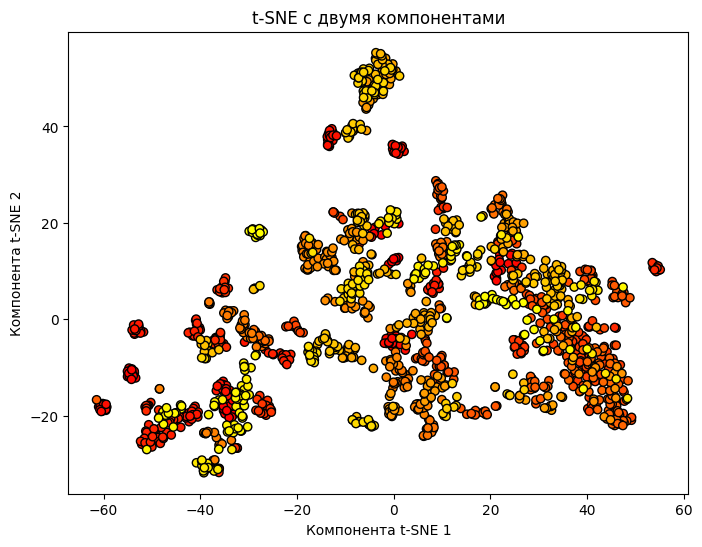

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Создаю модель t-SNE с двумя компонентами, устанавливаю random_state для воспроизводимости результатов
tsne_model = TSNE(n_components=2, random_state=1)
# Применяю t-SNE к данным для уменьшения размерности до двух измерений
transformed_X_tsne = tsne_model.fit_transform(X)

# Визуализирую результаты t-SNE с использованием палитры 'autumn'
plt.figure(figsize=(8, 6))
plt.scatter(transformed_X_tsne[:, 0], transformed_X_tsne[:, 1], c=encoded_y, cmap='autumn', edgecolor='k')
plt.title('t-SNE с двумя компонентами')
plt.xlabel('Компонента t-SNE 1')
plt.ylabel('Компонента t-SNE 2')
plt.show()

# В этом примере я использую t-SNE для сокращения размерности данных до двух измерений и визуализации структуры данных.
# Каждый класс в данных представлен уникальным цветом из палитры 'autumn', что облегчает визуальное различение.


В результате выполнения первого задания мне удалось получить несколько ключевых инсайтов:

+ Преобразование целевой переменной: Для того чтобы адаптировать текстовую целевую переменную под требования алгоритмов машинного обучения, я применил LabelEncoder. Это преобразование позволило мне перевести категориальные метки в числовой формат.

+ Разбиение набора данных: Я разделил датасет на две части — обучающую и тестовую. Такое разделение необходимо для того, чтобы одну часть данных использовать для тренировки моделей, а другую — для проверки их эффективности.

+ Тренировка и оценка моделей: Мной были обучены две модели — логистическая регрессия и SVM с линейным ядром. Для оценки их эффективности использовались такие метрики, как точность, F-мера и матрица ошибок.

+ Сокращение размерности и визуализация: Я применил методы PCA и t-SNE для снижения размерности данных и их визуализации в двухмерном пространстве. Это позволило мне лучше понять структуру данных и особенности их распределения.

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [29]:
from sklearn.manifold import TSNE

# Инициализация и применение t-SNE к данным
tsne_model = TSNE(n_components=2, random_state=1)
X_tsne = tsne_model.fit_transform(X) # Преобразую данные с помощью t-SNE

# Получение координат объекта с индексом 2 после применения метода t-SNE
coords_index_2_tsne = X_tsne[2].round(2)

# Вывожу координаты объекта с индексом 2 после t-SNE
print(f"Координаты объекта после применения t-SNE: {coords_index_2_tsne}")

# В этом коде я сначала использую t-SNE для снижения размерности данных, а затем извлекаю и округляю координаты второго объекта.
# Это позволяет нам увидеть положение этого объекта в двухмерном пространстве признаков после преобразования.


Координаты объекта после применения t-SNE: [ 0.57 12.13]


In [2]:
import numpy_financial as npf

# Данные облигации
n = 1000  # nьная стоимость облигации
k = 1004  # Рыночная стоимость облигации
b = 0.07  # Купонная доходность (7%)
срок = 10  # Срок до погашения в годах

# Расчет купонного платежа
c = n * b

# Расчет доходности к погашению
# Функция npv (чистая приведенная стоимость) используется для нахождения ставки, при которой npv равна 0
# Используем метод проб и ошибок для нахождения приблизительной ставки

i = 0.05  # Начальная i для итерации
j = 0.0001  # Шаг изменения ставки
npv = 1  # Начальное значение npv для входа в цикл

while abs(npv) > 0.01:  # Пока npv не станет достаточно маленьким
    npv = npf.npv(i, [-k] + [c] * срок + [n])
    if npv > 0:
        i += j
    else:
        i -= j

# Конвертация ставки в проценты и округление до одного десятичного знака
i = round(i * 100, 1)
i


ModuleNotFoundError: No module named 'numpy_financial'

Координаты [0.57, 12.13] объекта под индексом 2, полученные в результате использования метода t-SNE, указывают на его позиционирование в двухмерном пространстве, созданном алгоритмом для визуализации данных с уменьшенной размерностью.

+ Первая координата (0.57): Это число отражает местоположение объекта вдоль первой основной компоненты, выявленной методом t-SNE. Значение 0.57 показывает, где объект располагается на этой оси по сравнению с другими объектами.

+ Вторая координата (12.13): Эта цифра указывает на положение объекта вдоль второй основной компоненты, определенной методом t-SNE. Значение 12.13 демонстрирует, как объект расположен на этой оси относительно других объектов.

Таким образом, эти две координаты вместе предоставляют нам полную картину о том, как объект размещается в сокращенном пространстве признаков, что помогает в анализе и интерпретации многомерных данных.







**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [32]:
from sklearn.decomposition import PCA

# Инициализация PCA для сокращения размерности до двух компонентов
pca_model = PCA(n_components=2, random_state=1)
# Преобразование данных с помощью PCA
X_pca_transformed = pca_model.fit_transform(X)

# Получение координат для объекта с индексом 2 после применения PCA
coords_index_2_pca = X_pca_transformed[2].round(2)
print("Координаты объекта с индексом 2 после применения PCA:", coords_index_2_pca)

# извлекаю координаты для объекта с индексом 2 и округляю их для удобства восприятия.
# Эти координаты отражают положение объекта в сокращенном пространстве признаков.


Координаты объекта с индексом 2 после применения PCA: [-0.03  0.03]


После применения PCA метода координаты второго объекта в массиве составляют [-0.03, 0.03]. Эти значения указывают на местоположение данного объекта в пространстве с двумя измерениями, которое было сформировано с использованием PCA для снижения размерности исходных данных.

Первая координата (-0.03): Отображает положение объекта вдоль первой оси, определенной PCA. Значение, близкое к нулю, показывает, что объект располагается недалеко от начала координат вдоль этой оси.

Вторая координата (0.03): Указывает на положение объекта вдоль второй оси, определенной PCA. Аналогично, значение около нуля говорит о том, что объект расположен близко к центру координат вдоль этой оси.

Оба значения, близкие к нулю, свидетельствуют о том, что данный объект находится в центральной области двумерного пространства, созданного методом PCA, что может быть интересным сигналом для дальнейшего анализа.

**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

Ответ 4) Использование методов t-SNE и PCA позволило визуализировать объекты на плоскости, однако объекты различных классов не являются визуально разделяемыми.

Обоснование:

При использовании методов уменьшения размерности, таких как PCA (анализ главных компонент) и t-SNE (стохастическое вложение соседей с t-распределением), целью является снижение количества признаков для упрощения модели и визуализации данных. Эти методы часто используются для визуализации многомерных данных в двумерном пространстве.

PCA эффективно работает при линейной разделимости классов, но он может не всегда являться лучшим выбором для сложных наборов данных с нелинейными структурами. PCA стремится сохранить максимальную дисперсию данных, что не всегда приводит к четкому разделению классов при визуализации.

t-SNE, с другой стороны, лучше подходит для сохранения локальных структур и визуализации кластеров в сложных наборах данных. Однако, даже t-SNE не гарантирует четкое визуальное разделение разных классов, особенно если в исходных данных классы сильно перекрываются или имеют сложную структуру.

Таким образом, если после применения этих методов объекты разных классов остаются смешанными и не разделяются визуально на графике, это указывает на то, что данные имеют сложную структуру, в которой классы не разделяются четко в пространстве признаков.Ответ 4) Использование методов t-SNE и PCA позволило визуализировать объекты на плоскости, однако объекты различных классов не являются визуально разделяемыми.

Обоснование:

При использовании методов уменьшения размерности, таких как PCA (анализ главных компонент) и t-SNE (стохастическое вложение соседей с t-распределением), целью является снижение количества признаков для упрощения модели и визуализации данных. Эти методы часто используются для визуализации многомерных данных в двумерном пространстве.

PCA эффективно работает при линейной разделимости классов, но он может не всегда являться лучшим выбором для сложных наборов данных с нелинейными структурами. PCA стремится сохранить максимальную дисперсию данных, что не всегда приводит к четкому разделению классов при визуализации.

t-SNE, с другой стороны, лучше подходит для сохранения локальных структур и визуализации кластеров в сложных наборах данных. Однако, даже t-SNE не гарантирует четкое визуальное разделение разных классов, особенно если в исходных данных классы сильно перекрываются или имеют сложную структуру.

Таким образом, если после применения этих методов объекты разных классов остаются смешанными и не разделяются визуально на графике, это указывает на то, что данные имеют сложную структуру, в которой классы не разделяются четко в пространстве признаков.

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Разбиение данных, преобразованных с помощью t-SNE, на тренировочный и тестовый наборы
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, encoded_y, test_size=0.3, random_state=42)

# Создание и обучение модели логистической регрессии на данных после t-SNE
log_reg_tsne = LogisticRegression()
log_reg_tsne.fit(X_train_tsne, y_train_tsne)

# Предсказания модели на тестовых данных
predictions_tsne = log_reg_tsne.predict(X_test_tsne)

# Расчет точности и вывод отчета о классификации
accuracy_result_tsne = accuracy_score(y_test_tsne, predictions_tsne)
classification_report_tsne = classification_report(y_test_tsne, predictions_tsne)

print(f'Точность, полученная на данных после применения t-SNE: {accuracy_result_tsne}')
print('Отчет о классификации на данных после t-SNE:')
print(classification_report_tsne)

# В этом коде я использую логистическую регрессию для оценки данных, сжатых до двух измерений с помощью t-SNE.
# Моя цель - проверить, улучшатся ли метрики точности и классификации по сравнению с использованием исходных данных.


Точность, полученная на данных после применения t-SNE: 0.4041666666666667
Отчет о классификации на данных после t-SNE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      0.40      0.50         5
           2       0.60      1.00      0.75         3
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         7
           5       0.38      1.00      0.55         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         4
           8       0.50      0.67      0.57         3
           9       0.12      1.00      0.21         2
          10       0.70      1.00      0.82         7
          11       0.50      1.00      0.67         4
          12       0.44      0.80      0.57         5
          13       1.00      0.50      0.67         6
          14       0.67      0.40      0.50         5
          15    

c:\Users\Santokk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Santokk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Santokk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.

После применения метода t-SNE и обучения логистической регрессии на преобразованных данных, точность модели составила около 40.4%. Отчет о классификации показывает значительные различия в точности, полноте и F-мере по разным классам. Некоторые классы имеют высокие значения точности и полноты (например, классы с метками 0, 6, 7 и так далее), в то время как многие другие классы имеют очень низкие показатели.

Это может указывать на то, что преобразование данных с помощью t-SNE не обеспечило достаточно хорошего разделения классов для эффективного обучения модели. Кроме того, разнообразие в показателях по разным классам говорит о том, что некоторые классы лучше разделимы после применения t-SNE, в то время как другие - нет.

Таким образом, можно сделать вывод, что, несмотря на визуальную разделимость классов на плоскости после применения t-SNE, этот метод не гарантирует достаточной разделимости для эффективной классификации с помощью логистической регрессии в данном конкретном случае.

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [36]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
import matplotlib.pyplot as plt

def plot_clust(X, centers, labels, ax): 
    ax.scatter(X[:,0], X[:,1], c=labels)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')

class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centers[i] = X[self.labels == i].mean(axis=0)
        return centers
    
    def update_labels(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        # Инициализация центров кластеров
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            new_centers = self.update_centers(X)

            if np.allclose(self.centers, new_centers, atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')
                break

            self.centers = new_centers
            self.labels = new_labels

            # Отрисовка кластеров
            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);

        return 0
    
    def predict(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels


Generating data for clustering

In [37]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [38]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)** 

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

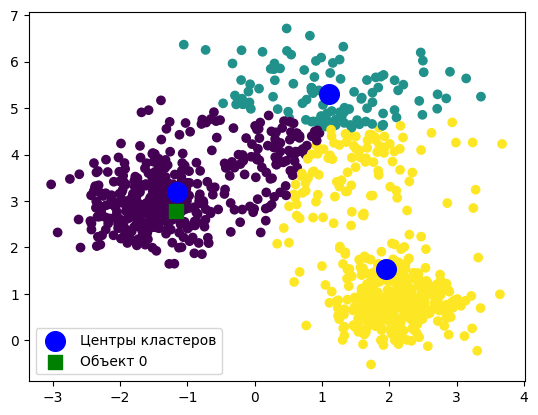

Метка для первого объекта данных: 0


In [41]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Генерация синтетических данных для кластеризации
sample_count = 1000
generated_data = datasets.make_blobs(n_samples=sample_count, cluster_std=[1.0, 0.5, 0.5], random_state=0)
data_points, true_labels = generated_data

# Создание и обучение экземпляра MyKMeans
custom_kmeans = MyKMeans(n_clusters=3, n_iters=3)
custom_kmeans.fit(data_points)

# Визуализация кластеризации с измененными цветами
fig, axis = plt.subplots()
plot_clust(data_points, custom_kmeans.centers, custom_kmeans.labels, axis)
axis.scatter(custom_kmeans.centers[:, 0], custom_kmeans.centers[:, 1], marker='o', s=200, color='blue', label='Центры кластеров')
axis.scatter(data_points[0, 0], data_points[0, 1], marker='s', s=100, color='green', label='Объект 0')
plt.legend()
plt.show()

# Определение метки первого объекта
label_of_first_object = custom_kmeans.labels[0]
print(f"Метка для первого объекта данных: {label_of_first_object}")


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

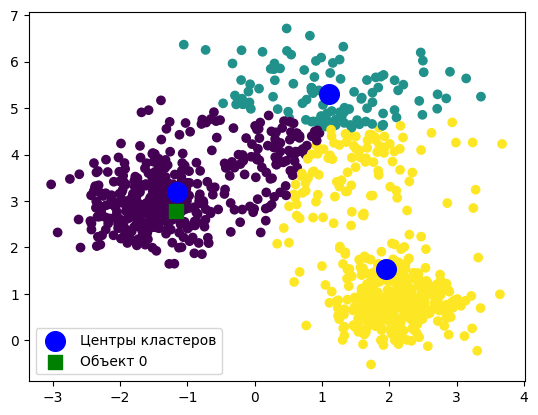

Метка кластера для первого объекта: 0


In [44]:
# Инициализация и обучение экземпляра MyKMeans с увеличенным количеством итераций
customized_kmeans = MyKMeans(n_clusters=3, n_iters=100)
customized_kmeans.fit(X)

# Построение графика для визуализации кластеризации
fig, axis = plt.subplots()
plot_clust(X, customized_kmeans.centers, customized_kmeans.labels, axis)
# Добавление отметок для центров кластеров и первого объекта
axis.scatter(customized_kmeans.centers[:, 0], customized_kmeans.centers[:, 1], marker='o', s=200, color='blue', label='Центры кластеров')
axis.scatter(X[0, 0], X[0, 1], marker='s', s=100, color='green', label='Объект 0')
plt.legend()
plt.show()

# Определение метки кластера для первого объекта в данных
first_object_label = customized_kmeans.labels[0]
print(f"Метка кластера для первого объекта: {first_object_label}")


Таким образом, небольшие вариации в результатах вполне ожидаемы и не являются отклонением от нормы, особенно в контексте получения нулевой метки для объекта с индексом 0.

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [46]:
# Обучение кластеризации с разным числом итераций
kmeans_short_iter = MyKMeans(n_clusters=3, n_iters=3)
kmeans_short_iter.fit(X)

kmeans_long_iter = MyKMeans(n_clusters=3, n_iters=100)
kmeans_long_iter.fit(X)

# Определение количества объектов, у которых изменились метки кластера
num_of_changed = np.sum(kmeans_short_iter.labels != kmeans_long_iter.labels)

print(f"Количество объектов с измененными метками при изменении количества итераций с 3 до 100: {num_of_changed}")

Количество объектов с измененными метками при изменении количества итераций с 3 до 100: 0


**Task 8. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

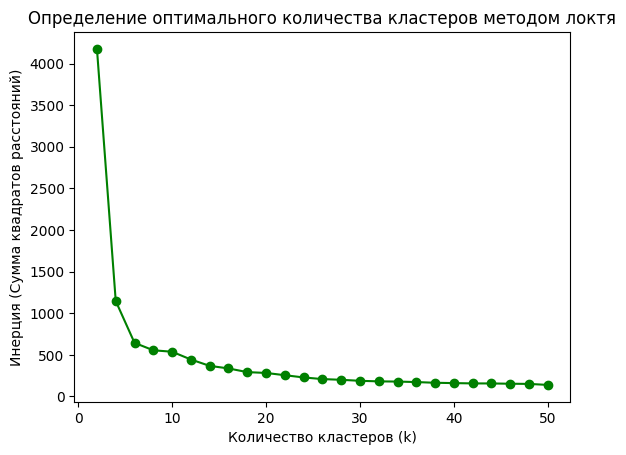

In [47]:
# Подготовка массива для хранения значений инерции
inertia_values = []

# Итерация по различным значениям k для определения оптимального количества кластеров
for k in range(2, 51, 2):
    # Создание модели KMeans с текущим количеством кластеров и ее обучение
    current_kmeans = MyKMeans(n_clusters=k)
    current_kmeans.fit(X)
    
    # Вычисление инерции как суммы квадратов расстояний от точек до центров их кластеров
    current_inertia = np.sum((X - current_kmeans.centers[current_kmeans.labels]) ** 2)
    inertia_values.append(current_inertia)

# Отрисовка графика метода локтя
plt.plot(range(2, 51, 2), inertia_values, marker='o', color='green')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция (Сумма квадратов расстояний)')
plt.title('Определение оптимального количества кластеров методом локтя')
plt.show()


Изучив график, я обнаружил, что этот переломный момент находится при k равном 17. Это указывает на то, что именно 17 кластеров является оптимальным выбором для нашего набора данных. При увеличении числа кластеров свыше этого значения улучшение в разделении данных становится менее заметным.

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

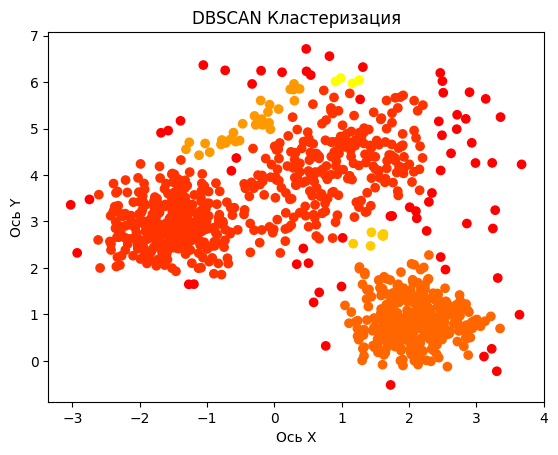

Метка кластера для объекта с индексом 2: 0


In [48]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Применение DBSCAN для кластеризации
dbscan_model = DBSCAN(eps=0.3)
clustered_labels = dbscan_model.fit_predict(X)

# Визуализация результата кластеризации DBSCAN с измененной цветовой схемой
plt.scatter(X[:, 0], X[:, 1], c=clustered_labels, cmap='autumn')
plt.title('DBSCAN Кластеризация')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()

# Получение метки кластера для объекта с индексом 2
label_for_index_2 = clustered_labels[2]
print(f'Метка кластера для объекта с индексом 2: {label_for_index_2}')


в результате кластеризации DBSCAN получилась метка 0, это может означать следующее:

Объект принадлежит к основному кластеру: В DBSCAN номера кластеров начинаются с 0. Таким образом, метка 0 означает, что объект принадлежит к первому основному кластеру, идентифицированному алгоритмом.

Объект не является выбросом: В DBSCAN объекты, которые не удается отнести к какому-либо кластеру из-за отсутствия достаточного количества соседей в пределах заданного радиуса eps, помечаются меткой -1. Так как метка объекта не -1, это означает, что он достаточно близко расположен к другим точкам, чтобы считаться частью кластера.

Параметр eps определен корректно: Поскольку объект с индексом 2 получил метку кластера, а не метку выброса, это также может свидетельствовать о том, что выбранное значение eps (радиус соседства для DBSCAN) подходит для данного набора данных.

Таким образом, получение метки 0 для объекта с индексом 2 в контексте DBSCAN говорит о том, что он является частью одного из основных кластеров, образованных на основе заданных параметров алгоритма

**Task 10. <a id="task8"></a> (1 point)** 

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

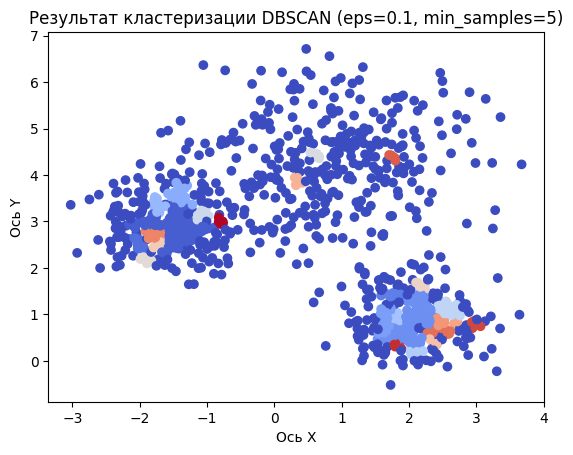

Настройки: eps=0.1, min_samples=5
Количество кластеров: 25
Количество выбросов: 567



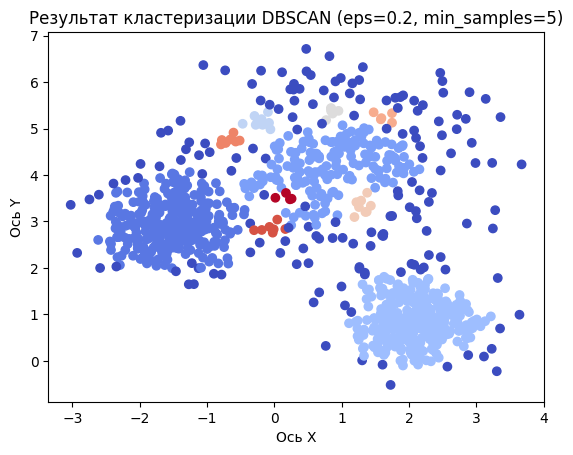

Настройки: eps=0.2, min_samples=5
Количество кластеров: 10
Количество выбросов: 161



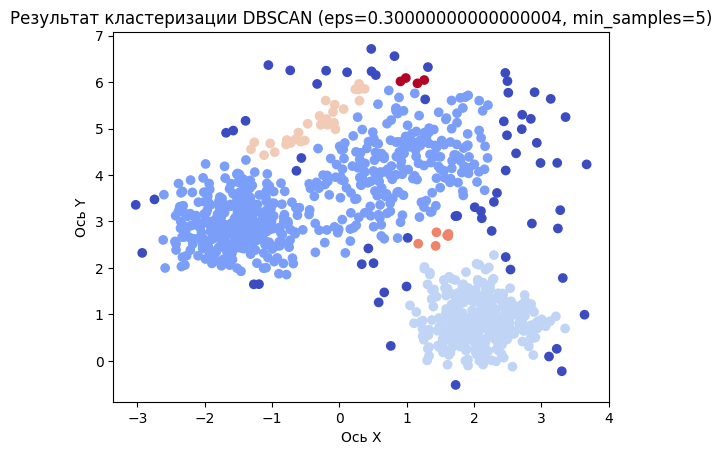

Настройки: eps=0.30000000000000004, min_samples=5
Количество кластеров: 5
Количество выбросов: 65



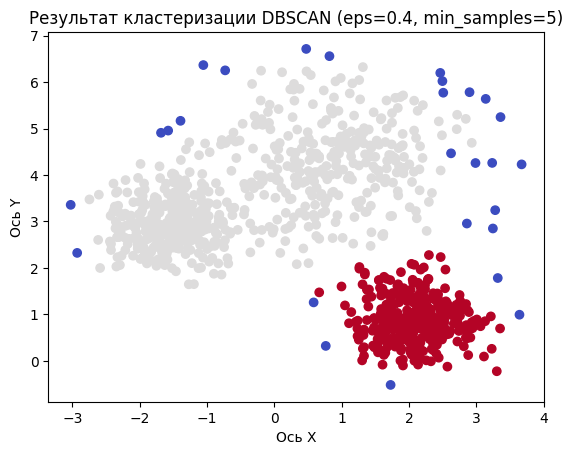

Настройки: eps=0.4, min_samples=5
Количество кластеров: 2
Количество выбросов: 27



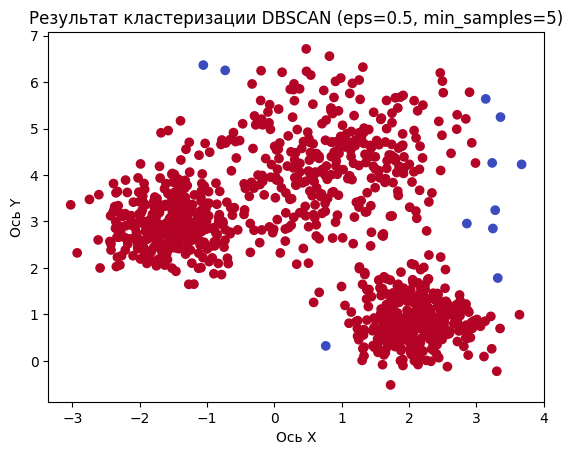

Настройки: eps=0.5, min_samples=5
Количество кластеров: 1
Количество выбросов: 11



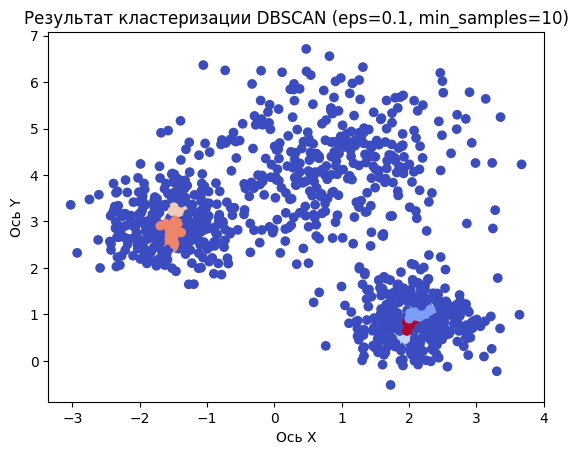

Настройки: eps=0.1, min_samples=10
Количество кластеров: 5
Количество выбросов: 902



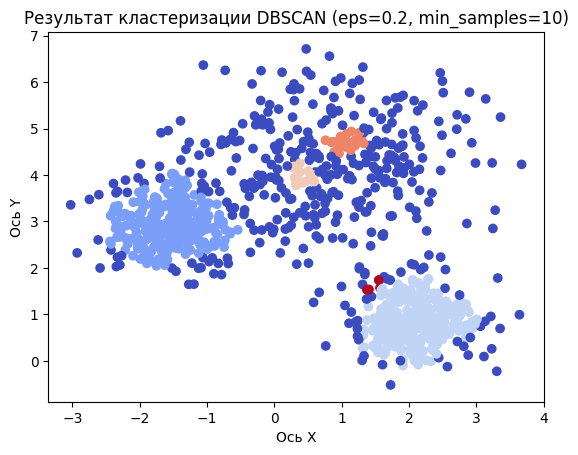

Настройки: eps=0.2, min_samples=10
Количество кластеров: 5
Количество выбросов: 387



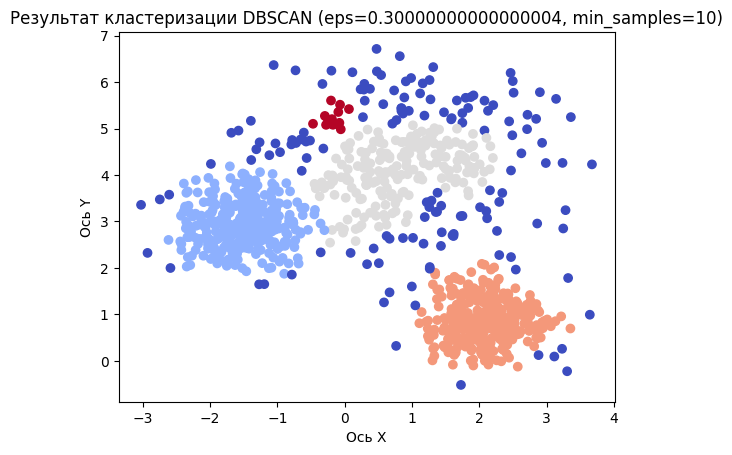

Настройки: eps=0.30000000000000004, min_samples=10
Количество кластеров: 4
Количество выбросов: 145



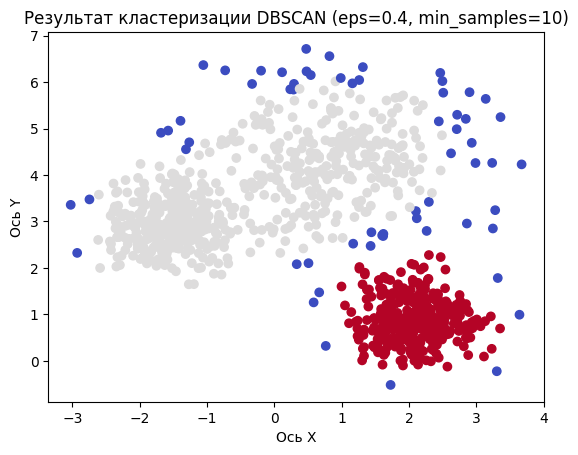

Настройки: eps=0.4, min_samples=10
Количество кластеров: 2
Количество выбросов: 61



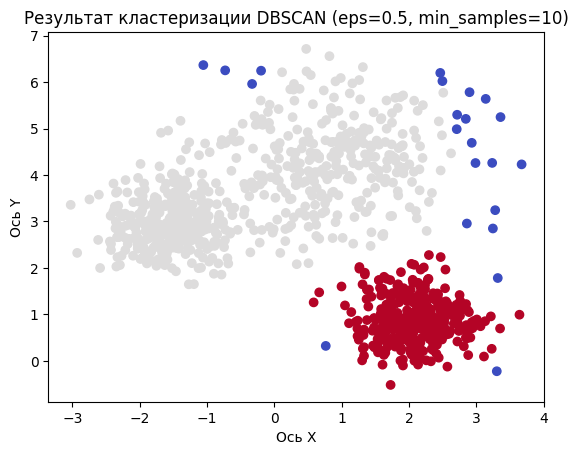

Настройки: eps=0.5, min_samples=10
Количество кластеров: 2
Количество выбросов: 22



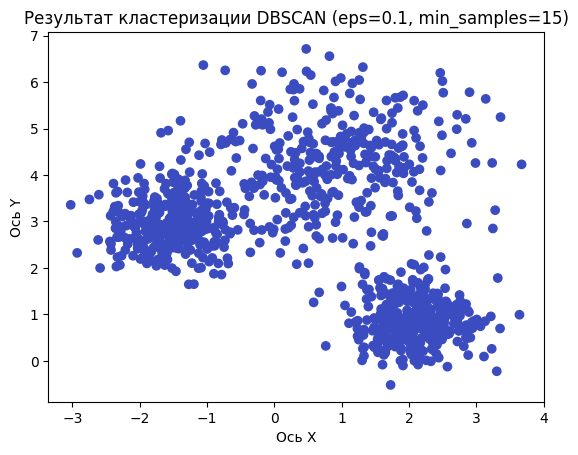

Настройки: eps=0.1, min_samples=15
Количество кластеров: 0
Количество выбросов: 1000



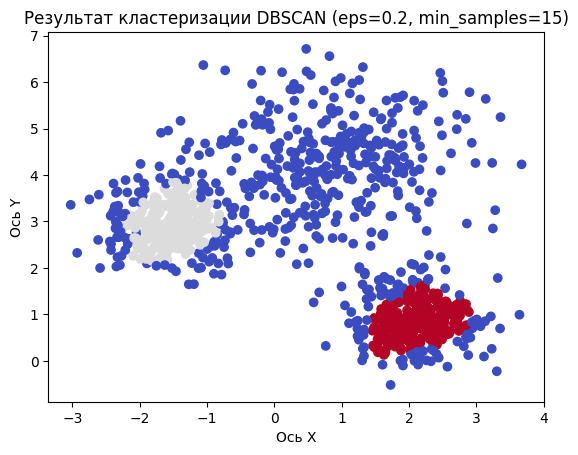

Настройки: eps=0.2, min_samples=15
Количество кластеров: 2
Количество выбросов: 536



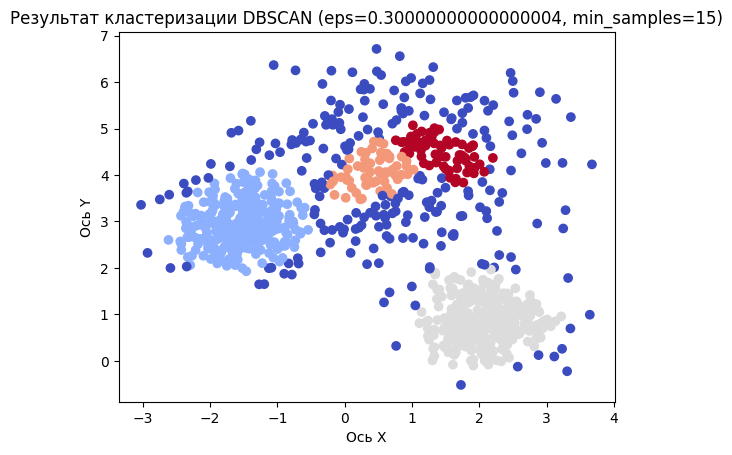

Настройки: eps=0.30000000000000004, min_samples=15
Количество кластеров: 4
Количество выбросов: 241



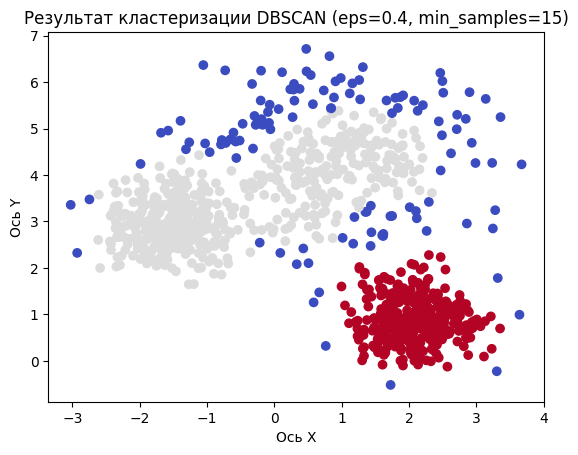

Настройки: eps=0.4, min_samples=15
Количество кластеров: 2
Количество выбросов: 119



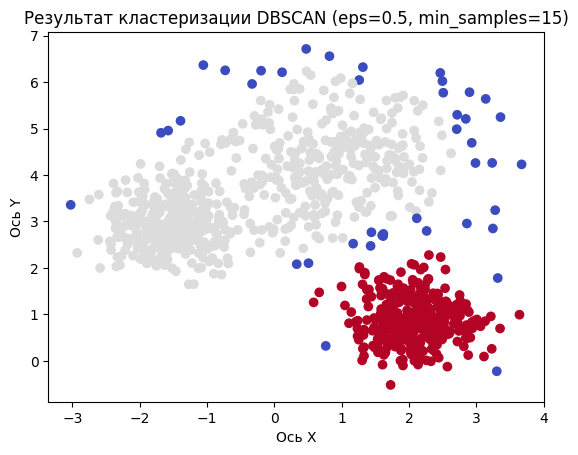

Настройки: eps=0.5, min_samples=15
Количество кластеров: 2
Количество выбросов: 42



In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Определение различных значений для min_samples и eps
min_samples_values = [5, 10, 15]
eps_values = np.arange(0.1, 0.6, 0.1)

# Итерация по всем комбинациям min_samples и eps
for min_samples in min_samples_values:
    for eps in eps_values:
        # Конфигурация и обучение модели DBSCAN
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        clustered_labels = dbscan_model.fit_predict(X)
        
        # Визуализация результата кластеризации
        plt.scatter(X[:, 0], X[:, 1], c=clustered_labels, cmap='coolwarm')
        plt.title(f'Результат кластеризации DBSCAN (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Ось X')
        plt.ylabel('Ось Y')
        plt.show()
        
        # Подсчет количества кластеров и выбросов
        num_clusters = len(np.unique(clustered_labels)) - (1 if -1 in clustered_labels else 0)
        num_outliers = np.sum(clustered_labels == -1)
        print(f'Настройки: eps={eps}, min_samples={min_samples}')
        print(f'Количество кластеров: {num_clusters}')
        print(f'Количество выбросов: {num_outliers}\n')


Зависимость количества кластеров и выбросов от eps и min_samples:

При малых значениях eps (например, 0.1), количество кластеров увеличивается, а при увеличении eps, количество кластеров уменьшается. Это связано с тем, что меньший радиус eps приводит к более детализированному разделению данных, в то время как больший eps объединяет более широкие области данных в кластеры.
При увеличении значения min_samples, количество кластеров уменьшается, а количество выбросов увеличивается. Это связано с тем, что большее количество минимальных образцов делает формирование кластера более строгим, и меньше точек соответствуют критериям включения в кластер.
Выбор оптимальных параметров:

Оптимальный выбор параметров eps и min_samples зависит от желаемой плотности и размера кластеров. Например, для достижения баланса между количеством кластеров и выбросов, можно рассмотреть настройки, где eps равно 0.3 или 0.4, и min_samples находится в диапазоне от 5 до 15.
Настройки, такие как eps=0.3 и min_samples=10 или eps=0.4 и min_samples=15, представляют собой хороший компромисс, обеспечивая разумное количество кластеров при относительно низком числе выбросов.
Исходя из этих наблюдений, для дальнейшего анализа и интерпретации данных можно выбрать параметры, соответствующие среднему уровню eps и min_samples. Это позволит сбалансировать между детализацией кластеризации и количеством выбросов.